In [0]:
!pip install mxnet-cu100

#MXNet (From Scratch)

In [0]:
import mxnet as mx
from mxnet import nd, autograd, gluon
import matplotlib.pyplot as plt

data_ctx = mx.cpu()
model_ctx = mx.gpu()

In [0]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def function(x, num_examples = num_examples):
    linear = 2 * x[:, 0] - 0.2 * x[:, 1] + 2.4
    return nd.where(linear > 0, linear.ones_like(), linear.zeros_like())

train_x = nd.random.normal(shape = (num_examples, num_inputs), ctx = data_ctx)
train_y = function(train_x)

test_x = nd.random.normal(shape = (1000, num_inputs), ctx = data_ctx)
test_y= function(test_x)

print(train_x.shape)
print(train_y.shape)

print(test_x.shape)
print(test_y.shape)

print(train_y.max())
print(train_y.min())

(10000, 2)
(10000,)
(1000, 2)
(1000,)

[1.]
<NDArray 1 @cpu(0)>

[0.]
<NDArray 1 @cpu(0)>


##Visualizing training dataset

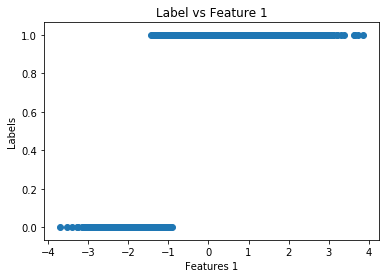

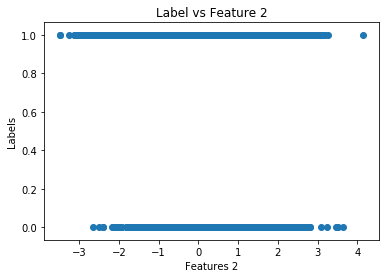

In [0]:
plt.scatter(train_x[:, 0].asnumpy(), train_y.asnumpy())
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.show()

plt.scatter(train_x[:, 1].asnumpy(), train_y.asnumpy())
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.show()

##Visualizing testing dataset

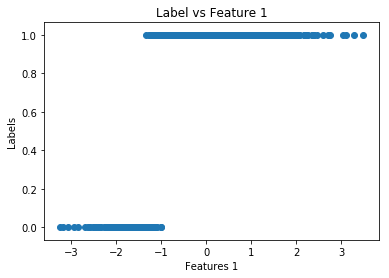

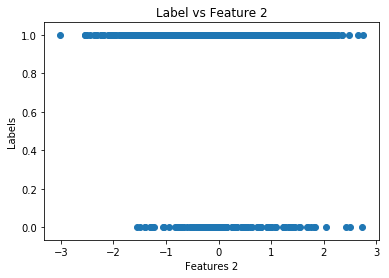

In [0]:
plt.scatter(test_x[:, 0].asnumpy(), test_y.asnumpy())
plt.title('Label vs Feature 1')
plt.xlabel('Features 1')
plt.ylabel('Labels')
plt.show()

plt.scatter(test_x[:, 1].asnumpy(), test_y.asnumpy())
plt.title('Label vs Feature 2')
plt.xlabel('Features 2')
plt.ylabel('Labels')
plt.show()

##Defining data iterator for training dataset

In [0]:
batch_size = 16
dataset = gluon.data.DataLoader(gluon.data.ArrayDataset(train_x, train_y), batch_size = batch_size, shuffle = True)

##Building logistic regression model

In [0]:
weight = nd.random.normal(shape = (num_inputs, num_outputs), ctx = model_ctx)
bias = nd.random.normal(shape = num_outputs, ctx = model_ctx)
params = [weight, bias]

for param in params:
    param.attach_grad()

def sigmoid(linear):
    return 1/(1 + nd.exp(-linear))

def logisticregression(inputs):
    return sigmoid(nd.dot(inputs, weight) + bias)

##Defining our objective function

In [0]:
def binarycrossentropy(predictions, labels):
    return -nd.mean((labels * nd.log(predictions)) +((1 - labels) * nd.log(1 - predictions)))

##Defining our parameters optimizer

In [0]:
def sgd(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

##Training the  model

In [0]:
epochs = 20
num_batches = num_examples/batch_size
learning_rate = .001
losses = []

for epoch in range(epochs):
    cumulative_loss = 0
    for i, (features, labels) in enumerate(dataset):
        features = features.as_in_context(model_ctx)
        labels = labels.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = logisticregression(features)
            loss = binarycrossentropy(output, labels)
        loss.backward()
        sgd(params, learning_rate)
        cumulative_loss += loss

    print('Epoch: {} Loss: {}'.format(epoch, cumulative_loss.asscalar()/num_batches))
    losses.append(cumulative_loss.asscalar()/num_batches)

Epoch: 0 Loss: 0.509752783203125
Epoch: 1 Loss: 0.454004833984375
Epoch: 2 Loss: 0.409809375
Epoch: 3 Loss: 0.374625390625
Epoch: 4 Loss: 0.34635927734375
Epoch: 5 Loss: 0.3234034423828125
Epoch: 6 Loss: 0.304516943359375
Epoch: 7 Loss: 0.2887626708984375
Epoch: 8 Loss: 0.2754518798828125
Epoch: 9 Loss: 0.264072412109375
Epoch: 10 Loss: 0.2542323486328125
Epoch: 11 Loss: 0.245634619140625
Epoch: 12 Loss: 0.2380513916015625
Epoch: 13 Loss: 0.231306494140625
Epoch: 14 Loss: 0.2252602783203125
Epoch: 15 Loss: 0.219806982421875
Epoch: 16 Loss: 0.214854248046875
Epoch: 17 Loss: 0.210330908203125
Epoch: 18 Loss: 0.2061768798828125
Epoch: 19 Loss: 0.20234356689453126


In [0]:
def plot(losses, model = logisticregression, sample_size=100):
    xs = list(range(len(losses)))
    plt.plot(xs, losses, '-r')
    plt.title('Loss during training')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()
    ####################################
    # Visualizing training predictions #
    ####################################
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(model_ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 0].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 1')
    plt.show()
    
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             model(train_x[:sample_size, :].as_in_context(model_ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(train_x[:sample_size, 1].asnumpy(),
             function(train_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on training data as viewed from feature 2')
    plt.show()
    ####################################
    # Visualizing testing predictions #
    ####################################
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(model_ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 0].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('First Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 1')
    plt.show()
    
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             model(test_x[:sample_size, :].as_in_context(model_ctx)).asnumpy(), 'or', label='Estimated')
    plt.plot(test_x[:sample_size, 1].asnumpy(),
             function(test_x[:sample_size, :]).asnumpy(), '*g', label='Real')
    plt.legend()
    plt.xlabel('Second Features')
    plt.ylabel('Labels')
    plt.title('Prediction on testing data as viewed from feature 2')
    plt.show()

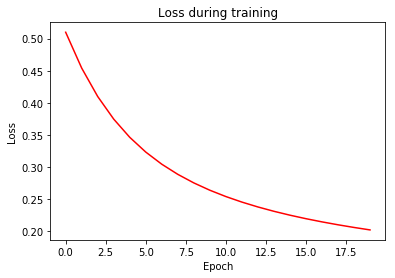

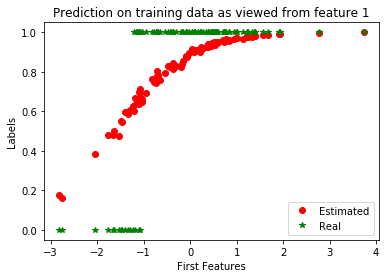

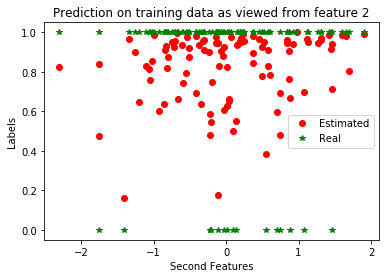

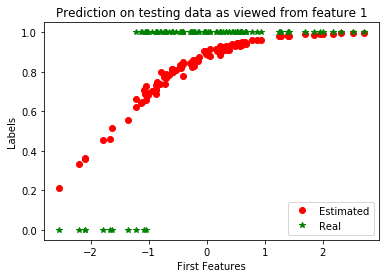

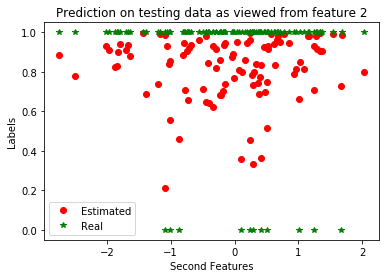

In [0]:
plot(losses)

##Lets look out our weight and bias value after training

In [0]:
print(f'Weight: {weight}')
print(f'Bias: {bias}')

Weight: 
[[1.2959139 ]
 [0.13166721]]
<NDArray 2x1 @gpu(0)>
Bias: 
[2.112116]
<NDArray 1 @gpu(0)>
